<h1 align="center">Introduction to Theano</h1>

<h2 align="center">Jorge A. Vanegas</h2>

<div align="center"><img src="images/mindlab-logo-simple.png" style="width: 160px; display: inline; padding:25px;"> <img src="images/unal-logo.png" style="width: 150px; display: inline; padding: 0 0 20px 0;"></div>

# Outline

* What’s Theano?
* Using Theano
* Basic Usage: 
    * Building expressions
    * Compiling and running expressions
* Advanced Usage: 
    * Modifying expressions
    * Debugging 
* Case study 1: Logistic Regression
* Case study 2: Multi-layer Perceptron

# What’s Theano?

## Theano is a Python library that lets you to define, optimize, and evaluate mathematical expressions.
* Easy to define expressions
    * Expressions mimic NumPy's syntax and semantics
* Possible to manipulate those expressions
    * Substitutions
    * Gradient
    * Stability optimizations
    
## Fast to compute values for those expressions
* Speed optimizations
* Use fast back-ends (CUDA, BLAS, custom Ccode)

## Tools to inspect and check for correctness

# Related projects

* Blocks
* Keras
* Lasagne
* Morb
* Pylearn2
* PyMC 3
* Sklearn-theano
* Theano-rnn
* ...


# How to install Theano
http://deeplearning.net/software/theano/install.html#install

Requirements
* OS: Linux, Mac OS X, Windows
* Python: >= 2.6
* NumPy, SciPy, BLAS 
<pre><code>
    pip install [--upgrade] theano
</code></pre>
<pre><code>
    easy_install [--upgrade] theano
</code></pre>

Install from source code
https://github.com/Theano/Theano

# Numpy

* Numpy is the core library for scientific computing in Python. 
* It provides a high-performance multidimensional array object, and tools for working with these arrays.

NumPy for Matlab Users:

[http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users.html](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users.html).



# Arrays

In [1]:
import numpy as np

a = np.array([1, 2, 3])  # Create a rank 1 array
print a
print a.shape
print a[0], a[1], a[2]

[1 2 3]
(3,)
1 2 3


In [2]:
a[0] = 5                 # Change an element of the array
print a 

[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print b
print b.shape
print b[0, 1]
print b[0:1, 0:2]

[[1 2 3]
 [4 5 6]]
(2, 3)
2
[[1 2]]


Numpy provides many functions to create arrays:

In [4]:
np.zeros((2,2))  # Create an array of all zeros

array([[ 0.,  0.],
       [ 0.,  0.]])

In [5]:
np.ones((1,2))   # Create an array of all ones

array([[ 1.,  1.]])

In [6]:
np.eye(2)        # Create a 2x2 identity matrix

array([[ 1.,  0.],
       [ 0.,  1.]])

In [7]:
np.random.random((2,2)) # Create an array filled with random values

array([[ 0.83929762,  0.22563257],
       [ 0.59273771,  0.01902199]])

Array math - Elementwise

In [116]:
x = np.array([[1,2],[3,4]], dtype=np.float32)
y = np.array([[5,6],[7,8]], dtype=np.float32)

In [117]:
print x + y

[[  6.   8.]
 [ 10.  12.]]


In [118]:
print np.add(x, y)

[[  6.   8.]
 [ 10.  12.]]


In [119]:
print x - y # np.subtract(x, y)

[[-4. -4.]
 [-4. -4.]]


In [120]:
print x * y # np.multiply(x, y)

[[  5.  12.]
 [ 21.  32.]]


In [121]:
print x / y # np.divide(x, y)

[[ 0.2         0.33333334]
 [ 0.42857143  0.5       ]]


In [122]:
print np.sqrt(x)

[[ 1.          1.41421354]
 [ 1.73205078  2.        ]]


** * ** is elementwise multiplication, not matrix multiplication. We instead use the **dot** function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

In [123]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print v.dot(w)
print np.dot(v, w)

219
219


In [17]:
# Matrix / matrix product
print x.dot(y)

[[19 22]
 [43 50]]


Array math - Other useful functions

In [18]:
x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [19]:
x = np.array([[1,2], [3,4]])
print x

[[1 2]
 [3 4]]


In [20]:
print x.T 

[[1 3]
 [2 4]]


# Theano language
* Operations on scalar, vector, matrix, tensor, and sparse variables
* Linear algebra
* Element-wise nonlinearities
* Convolution
* Extensible

# Using Theano

## 1. Define expression
$$f(x, y) = x + y$$

## 2. Compile expression

    int f(int x, int y) {
        return x + y;
    }


In [21]:
def f(x, y):
    return x + y

## 3. Execute expression

In [22]:
f(1,2)

3

##Example: Adding two Scalars

1) Define expression

In [107]:
import theano.tensor as T

In [108]:
x = T.dscalar('x')  # symbolic variables
y = T.dscalar('y')

In [109]:
z = x + y # symbolic expression

2) Compile expression

In [110]:
import theano
# first arg is list of SYMBOLIC inputs; second arg is SYMBOLIC output
f = theano.function([x, y], z)

3) Execute expression

In [111]:
# Call it with NUMERICAL values; Get a NUMERICAL output
f(2, 3)

array(5.0)

In [112]:
f(16.3, 12.1)

array(28.4)

# Using Theano - Basic Usage

# Building Symbolic Expressions

**theano.tensor**

Theano also has variable types for vectors, matrices, and tensors. The theano.tensor submodule has various functions for performing operations on these variables.

In [32]:
A = T.matrix('A')
x = T.vector('x')
b = T.vector('b')

Expressions mimic NumPy’s syntax & semantics

$$ y = A∙x + b $$ 
$$ z = \left \| A \right \|_2^2 $$

In [33]:
y = T.dot(A, x) + b
# Note that squaring a matrix is element-wise
z = T.sum(A**2)

**theano.function**

* **theano.function** can compute multiple things at a time
* You can also set default parameter values

In [34]:
b_default = np.array([0, 0], dtype=theano.config.floatX)
linear_mix = theano.function([A, x, theano.Param(b, default=b_default)], [y, z])

# Supplying values for A, x, and b
print(linear_mix(np.array([[1, 2, 3],
                           [4, 5, 6]], dtype=theano.config.floatX), #A
                 np.array([1, 2, 3], dtype=theano.config.floatX), #x
                 np.array([4, 5], dtype=theano.config.floatX))) #b

# Using the default value for b
print(linear_mix(np.array([[1, 2, 3],
                           [4, 5, 6]], dtype=theano.config.floatX), #A
                 np.array([1, 2, 3], dtype=theano.config.floatX))) #x

[array([ 18.,  37.], dtype=float32), array(91.0, dtype=float32)]
[array([ 14.,  32.], dtype=float32), array(91.0, dtype=float32)]


# Tensors
* Dimensionality defined by length of “broadcastable” argument
* Can add (or do other elemwise op) on two tensors with same dimensionality
* Duplicate tensors along broadcastable axes to make size match


In [35]:
from theano import tensor as T

tensor3 = T.TensorType(broadcastable=[False, False, False], dtype='float32')
x = tensor3('x')

matrix = T.TensorType(broadcastable=[False, False], dtype='float32')
x = matrix('x')

# Broadcasting Tensors
* Implicit replication of arrays along broadcastable dimensions

<div align="center"><img src="images/bcast.png" style="width: 250px;" ></div>

In [36]:
x = T.TensorType(broadcastable=[True, False], dtype='float32')('x')
y = T.matrix('y')
f = theano.function([x, y], x + y)

x_value = np.array([[1, 2]], dtype=theano.config.floatX)

y_value = np.array([[1, 2],
                    [3, 4],
                    [5, 6]], dtype=theano.config.floatX)
                   
f(x_value, y_value)

array([[ 2.,  4.],
       [ 4.,  6.],
       [ 6.,  8.]], dtype=float32)

<div align="center"><img src="images/bcast.png" style="width: 250px;" ></div>

# Graph structure

<table style="border:none;">
<tr style="border:none;">
<td style="border:none;"> 
The graph that represents mathematical operations is <b>bipartite</b>, and two sorts nodes:
<br>
<br>
<lu>
<li>
<b>Variable</b> nodes, that represent data
</li>
<li>
<b>Apply</b> nodes, that represent the application of mathematical operations
</li>
<li>
<b>Op</b> nodes
</li>
<li>
<b>type</b> nodes
</li>
</lu>
<pre>
<code>
import theano.tensor as T

x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y
</code>
</pre>
</td>
<td style="border:none;"> 
<img src="images/graph-structure.png" style="width: 450px;"> 
</td>
</tr>
</table>

# printing.debugprint

In [37]:
import theano.tensor as T
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y

In [38]:
from theano import printing
printing.debugprint(z)

Elemwise{add,no_inplace} [id A] ''   
 |x [id B]
 |y [id C]


In [39]:
w = T.dmatrix('w')
printing.debugprint(w/z)

Elemwise{true_div,no_inplace} [id A] ''   
 |w [id B]
 |Elemwise{add,no_inplace} [id C] ''   
   |x [id D]
   |y [id E]


# printing.pydotprint

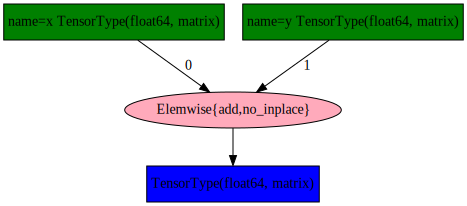

In [40]:
from theano import printing
from IPython.display import SVG
image = printing.pydotprint(z, compact=False, return_image=True, format='svg')
SVG(image)

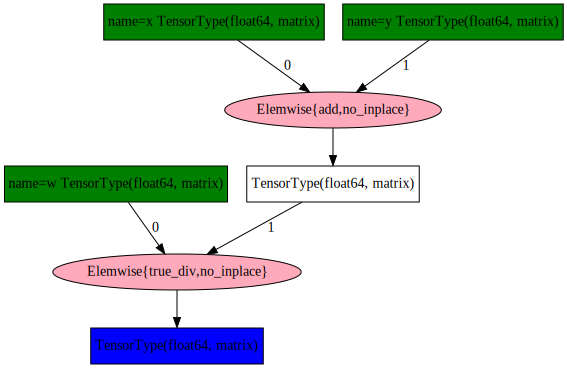

In [41]:
image = printing.pydotprint(w/z, compact=False, return_image=True, format='svg')
SVG(image)

# Optimizations
Theano changes the symbolic expressions you write before converting them to C code
* It makes them faster

$$(x+y) + (x+y) \rightarrow 2 * (x+y)$$

* It makes them more stable

$$exp(a) / exp(a).sum(axis=1) \rightarrow softmax(a)$$

# Optimizations
* Sometimes optimizations discard error checking and produce incorrect output rather than an exception

In [105]:
x = T.scalar()
f = theano.function([x], x/x)
f(0.)

array(1.0, dtype=float32)

# Using Theano - Advanced Usage

# Shared variables
* A **shared variable** is a buffer that stores a numerical value for a theano variable
     * think as a global variable
* Modify outside function with **get_value** and **set_value**
* They're also useful because they have state across function calls.

In [43]:
shared_var = theano.shared(np.array([[1, 2], [3, 4]], dtype=theano.config.floatX))
# The type of the shared variable is deduced from its initialization
print(shared_var.type())

<CudaNdarrayType(float32, matrix)>


In [44]:
# We can set the value of a shared variable using set_value
shared_var.set_value(np.array([[3, 4], [2, 1]], dtype=theano.config.floatX))
# ..and get it using get_value
print(shared_var.get_value())

[[ 3.  4.]
 [ 2.  1.]]


In [45]:
shared_squared = shared_var**2
# Note that because shared_var is shared, it already has a value, so it doesn't need to be an input to the function.
function_1 = theano.function([], shared_squared)
print(function_1())

[[  9.  16.]
 [  4.   1.]]


#  The updates keyword
* We can also update the state of a shared variable in a function
* Updates takes a dict where keys are shared variables and values are the new value the shared variable should take


In [46]:
print("shared_var before using function_2:")
print(shared_var.get_value())

shared_var before using function_2:
[[ 3.  4.]
 [ 2.  1.]]


In [47]:
subtract = T.matrix('subtract')
# Here, updates will set shared_var = shared_var - subtract
function_2 = theano.function([subtract], [], updates={shared_var: shared_var - subtract})
# Subtract [[1, 1], [1, 1]] from shared_var
function_2(np.array([[1, 1], [1, 1]], dtype=theano.config.floatX))
print("shared_var after calling function_2:")
print(shared_var.get_value())

shared_var after calling function_2:
[[ 2.  3.]
 [ 1.  0.]]


In [48]:
# This also changes the output of function_1, because shared_var is shared!
print(function_1())

[[ 4.  9.]
 [ 1.  0.]]


# Manipulating Symbolic Expressions
# Graph Transformations

#Automatic differentiation
* **tensor.grad(func, [params])**
* The second argument of **grad()** can be a list (partial derivatives)

In [53]:
x = T.dscalar('x')
y = x**2
theano.pp(y) # print out the function

'(x ** TensorConstant{2})'

In [55]:
gy = T.grad(y, x)
theano.pp(gy) # print out the gradient

'((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))'

In [56]:
f = theano.function([x], y)
f(4)

array(16.0)

In [58]:
gf = theano.function([x], gy)
gf(4)

array(8.0)

# Substitution

##The **givens** keyword

* Substitution at the moment, when compiling a function

* The **givens** parameter allow you to separate the description of the model and the exact definition of the inputs variable.

* The **givens** parameter can be used to replace any symbolic variable, not just a shared variable

In [59]:
# original model

A = theano.shared(np.array([[1, 2, 4], [5, 6, 7], [8, 9, 10]], dtype=theano.config.floatX))
b = theano.shared(np.array([[1, 2, 3]], dtype=theano.config.floatX))
x = T.vector('x')

y = T.dot(A, x) + b
f = theano.function([x], y)

input_data = np.array([2, 4, 8], dtype=theano.config.floatX)
f(input_data)

array([[  43.,   92.,  135.]], dtype=float32)

we want to add a preprocessing step

    x_n = (x - x.mean()) / x.std()

In [60]:
# redefine the model?
x_n = (x - x.mean()) / x.std()
y = T.dot(A, x_n) + b

f = theano.function([x], y)
f(input_data)

array([[ 4.74165773,  4.40535164,  5.40535355]], dtype=float32)

In [61]:
# define a preprocessing function?
x0 = T.vector('x')
x_n = (x0 - x0.mean()) / x0.std()
f_n = theano.function([x0], x_n)

# original model
y = T.dot(A, x) + b
f = theano.function([x], y)

preprocessing_data = f_n(input_data)
f(preprocessing_data)

array([[ 4.74165773,  4.40535164,  5.40535355]], dtype=float32)

In [62]:
# using givens
# preprocessing definition
x0 = T.vector('x')
x_n = (x0 - x0.mean()) / x0.std()

# original model
y = T.dot(A, x) + b

f_n = theano.function([x0], y, givens={x: x_n})
f_n(input_data)

array([[ 4.74165773,  4.40535164,  5.40535355]], dtype=float32)

# Debugging

* DebugMode
* compute_test_value
* min_informative_str
* DebugPrint
* Accessing the FunctionGraph

# DebugMode
* The DebugMode is designed to run several self-checks and assertions that can help diagnose possible programming errors leading to incorrect output
* It is recommended you use **DebugMode** during development

Preset compilation mode:
* FAST_RUN
* FAST_COMPILE
* DEBUG_MODE

* Without DebugMode:

In [63]:
import theano
from theano import tensor

x = tensor.dscalar('x')
f = theano.function([x], 10/x)
f(0)

array(inf)

* DebugMode can be used as follows:

In [64]:
f = theano.function([x], 10/x, mode='DebugMode')
f(0)

InvalidValueError: InvalidValueError
        type(variable) = TensorType(float64, scalar)
        variable       = Elemwise{true_div,no_inplace}.0
        type(value)    = <type 'numpy.ndarray'>
        dtype(value)   = float64
        shape(value)   = ()
        value          = inf
        min(value)     = inf
        max(value)     = inf
        isfinite       = False
        client_node    = None
        hint           = perform output
        specific_hint  = non-finite elements not allowed
        context        = ...
  Elemwise{true_div,no_inplace} [id A] ''   
   |TensorConstant{10} [id B]
   |x [id C]

        

# DebugMode
* **DebugMode** will raise an exception according to what went wrong, either at call time <code>(f(0))</code> or compile time (<code>f = theano.function(x, 10*x, mode='DebugMode')</code>). 
* It can also be used by setting the configuration variable config.mode. 
* It can also be used by passing a DebugMode instance as the mode, as in:

In [65]:
from theano.compile.debugmode import DebugMode

f = theano.function([x], 10*x, mode=DebugMode(check_c_code=False))

Validation options:
* stability_patience
* check_c_code
* check_py_code
* check_isfinite

...

# compute_test_value
Theano has a  mechanism by which graphs are executed on-the-fly, before a theano.function is ever compiled. Since optimizations haven’t been applied at this stage, it is easier for the user to locate the source of some bug

# compute_test_value = 'off'

In [66]:
import numpy as np
import theano
import theano.tensor as T

# compute_test_value is 'off' by default, meaning this feature is inactive
theano.config.compute_test_value = 'off' # Use 'warn' to activate this feature

x = T.vector()
y = T.vector()
z = x + y

f = theano.function([x, y], z, allow_input_downcast=True)

x_value = np.ones((2,))
y_value = np.ones((3,))

f(x_value, y_value)

ValueError: GpuElemwise. Input dimension mis-match. Input 1 (indices start at 0) has shape[0] == 3, but the output's size on that axis is 2.
Apply node that caused the error: GpuElemwise{Add}[(0, 0)](GpuFromHost.0, GpuFromHost.0)
Toposort index: 2
Inputs types: [CudaNdarrayType(float32, vector), CudaNdarrayType(float32, vector)]
Inputs shapes: [(2,), (3,)]
Inputs strides: [(1,), (1,)]
Inputs values: [<CudaNdarray object at 0x7fb413339d30>, <CudaNdarray object at 0x7fb413319a70>]
Outputs clients: [[HostFromGpu(GpuElemwise{Add}[(0, 0)].0)]]

Debugprint of the apply node: 
GpuElemwise{Add}[(0, 0)] [id A] <CudaNdarrayType(float32, vector)> ''   
 |GpuFromHost [id B] <CudaNdarrayType(float32, vector)> ''   
 | |<TensorType(float32, vector)> [id C] <TensorType(float32, vector)>
 |GpuFromHost [id D] <CudaNdarrayType(float32, vector)> ''   
   |<TensorType(float32, vector)> [id E] <TensorType(float32, vector)>

Storage map footprint:
 - <TensorType(float32, vector)>, Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - GpuFromHost.0, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - GpuFromHost.0, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float32, vector)>, Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 TotalSize: 40 Byte(s) 0.000 GB
 TotalSize inputs: 20 Byte(s) 0.000 GB

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.

# compute_test_value = 'warn'

In [23]:
import numpy as np
import theano
import theano.tensor as T

# enable on-the-fly graph computations
theano.config.compute_test_value = 'warn'

x = T.vector()
x.tag.test_value = np.ones((2,)).astype(theano.config.floatX)
y = T.vector()
y.tag.test_value = np.ones((3,)).astype(theano.config.floatX)

z = x + y

ValueError: Input dimension mis-match. (input[0].shape[0] = 2, input[1].shape[0] = 3)

In [67]:
# not compute test values
theano.config.compute_test_value = 'off'

# min_informative_str

In [68]:
from theano.printing import min_informative_str

x = T.scalar()
y = T.scalar()
z = x + y
z.name = 'z'
a = 2. * z

print min_informative_str(a)

A. Elemwise{mul,no_inplace}
 B. TensorConstant{2.0}
 C. z


# debugprint

In [69]:
from theano.printing import debugprint

debugprint(a)

Elemwise{mul,no_inplace} [id A] ''   
 |TensorConstant{2.0} [id B]
 |Elemwise{add,no_inplace} [id C] 'z'   
   |<TensorType(float32, scalar)> [id D]
   |<TensorType(float32, scalar)> [id E]


#Accessing the FunctionGraph ($fgraph$)

In [70]:
import theano

x = T.scalar()
y = 2 * x / x
f = theano.function([x], y)
debugprint(f.maker.fgraph.outputs[0])

DeepCopyOp [id A] ''   
 |TensorConstant{2.0} [id B]
